# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/hasil_clustering.csv')

In [4]:
df.head()

,tahun,peng,Cluster
0,2007,195176,1
1,2008,218780,1
2,2009,247427,1
3,2010,275749,1
4,2011,308000,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
features = ['tahun', 'peng']
label = 'Cluster'
X = df[features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Akurasi: 1.00

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       315
           1       1.00      1.00      1.00       419
           2       1.00      0.99      1.00       150

    accuracy                           1.00       884
   macro avg       1.00      1.00      1.00       884
weighted avg       1.00      1.00      1.00       884



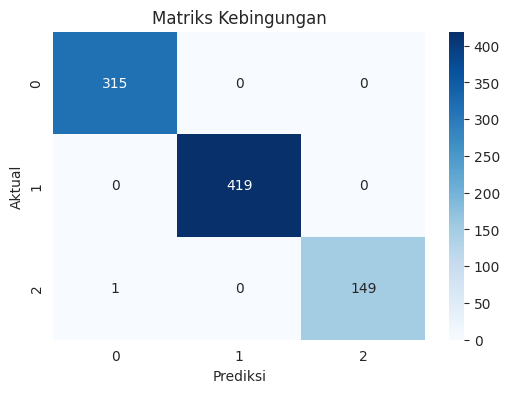

In [7]:
y_pred = classifier.predict(X_test)

metrics = {
    "Akurasi": accuracy_score(y_test, y_pred),
    "Laporan Klasifikasi": classification_report(y_test, y_pred),
    "Confusion Matrix": confusion_matrix(y_test, y_pred)
}

print(f"Akurasi: {metrics['Akurasi']:.2f}\n")
print("Laporan Klasifikasi:\n", metrics["Laporan Klasifikasi"])

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Blues",
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matriks Kebingungan')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [8]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [9]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Meskipun hasil evaluasi menunjukkan performa sempurna, ada beberapa kemungkinan yang perlu dipertimbangkan:

- Potensi Overfitting

  Akurasi 100% bisa menjadi indikasi bahwa model terlalu cocok dengan data pelatihan dan tidak dapat digeneralisasi dengan baik untuk data baru yang belum pernah dilihat.

  Jika model diuji pada dataset lain dan mengalami penurunan performa, kemungkinan besar model mengalami overfitting.

- Ketidakseimbangan Data

  Jika dataset memiliki distribusi kelas yang tidak seimbang, model mungkin hanya belajar mengenali pola dari kelas yang lebih dominan.

- Kualitas Data

  Jika data uji terlalu mirip dengan data latih, model mungkin hanya "mengingat" pola tanpa benar-benar memahami hubungan antar fitur.

2. Rekomendasi Perbaikan
- Meneraokan feature selection.
- Memperbagus silhouette score minimal 0.70.
- Mengimplementasikan 2 algoritma klasifikasi yang berbeda untuk membandingkan performa model.